<a href="https://colab.research.google.com/github/nfernandez97/Diseases_predictor/blob/main/Modelo_trabajo_grado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [ ]:
data = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2015.csv") #Diabetes dataset
data2 = pd.read_csv("/content/heart_disease_health_indicators_BRFSS2015.csv") #Corazón dataset

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
data = data.drop(['Stroke','AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','DiffWalk','Education','Income'], axis = 1)

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0


In [ ]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.094186,0.756544,0.634256,0.811420,0.056197,2.511392,0.440342,8.032119
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.292087,0.429169,0.481639,0.391175,0.230302,1.068477,0.496429,3.054220
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,13.000000


In [ ]:
#Eliminamos columnas duplicadas

data.drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


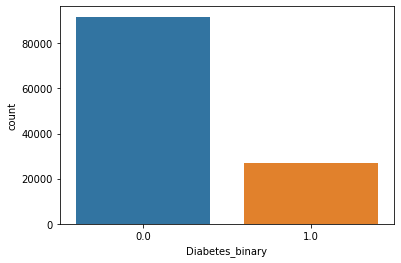

In [ ]:
sns.countplot(data['Diabetes_binary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


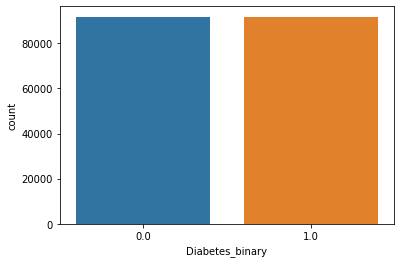

In [ ]:
# Se separan las clases para hacer un oversampling y balancear los datos

clase_0 = data[data['Diabetes_binary'] == 0]
clase_1 = data[data['Diabetes_binary'] == 1]

# Oversampling de la clase minoritaria 
clase_1_bal = clase_1.sample(len(clase_0), replace=True)

data_bal = pd.concat([clase_0, clase_1_bal], axis = 0)

sns.countplot(data_bal['Diabetes_binary'])

In [ ]:
#data_norm = data.select_dtypes('number').apply(lambda x: (x-x.mean())/x.std(),axis=0)

In [ ]:
y = data_bal['Diabetes_binary']
X = data_bal.drop(['Diabetes_binary'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [ ]:
model = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.7805755395683454
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.76     18238
         1.0       0.75      0.85      0.80     18458

    accuracy                           0.78     36696
   macro avg       0.79      0.78      0.78     36696
weighted avg       0.79      0.78      0.78     36696



In [ ]:
clf = DecisionTreeClassifier(random_state=123, max_depth=50)
clf = clf.fit(X_train, y_train)

prediccion = clf.predict(X_test)

print(accuracy_score(y_test, prediccion))
print(classification_report(y_test, prediccion))

0.7870885110093743
              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76     18238
         1.0       0.74      0.88      0.81     18458

    accuracy                           0.79     36696
   macro avg       0.80      0.79      0.78     36696
weighted avg       0.80      0.79      0.79     36696



In [ ]:
clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
model_1 = clf_base.fit(X_train, y_train)


pred_y = model_1.predict(X_test)

confusion_matrix(y_test, pred_y)

plt.show()
print(accuracy_score(y_test, pred_y))
print(classification_report(y_test, pred_y))

0.6868596032265097
              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67     18238
         1.0       0.68      0.73      0.70     18458

    accuracy                           0.69     36696
   macro avg       0.69      0.69      0.69     36696
weighted avg       0.69      0.69      0.69     36696



In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
pred_gnb = gnb_model.predict(X_test)

print(accuracy_score(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))

0.6538587311968607
              precision    recall  f1-score   support

         0.0       0.80      0.41      0.54     18238
         1.0       0.61      0.90      0.72     18458

    accuracy                           0.65     36696
   macro avg       0.70      0.65      0.63     36696
weighted avg       0.70      0.65      0.63     36696



#Predicción enfermedades cardíacas

In [ ]:
data2.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data2.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
data2 = data2.drop(['AnyHealthcare','NoDocbcCost','MentHlth','PhysHlth','DiffWalk','Education','Income'], axis = 1)

In [ ]:
data2.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,Sex,Age
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,0.811420,0.056197,2.511392,0.440342,8.032119
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,0.391175,0.230302,1.068477,0.496429,3.054220
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,13.000000


In [ ]:
data2.drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


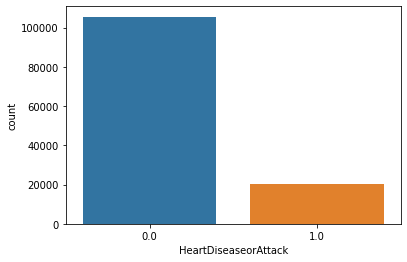

In [ ]:
sns.countplot(data2['HeartDiseaseorAttack'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


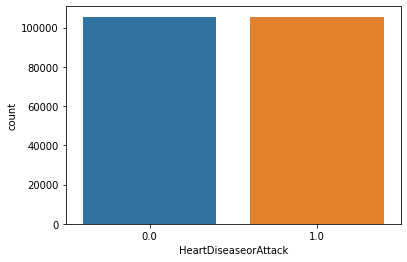

In [ ]:
clase_0 = data2[data2['HeartDiseaseorAttack'] == 0]
clase_1 = data2[data2['HeartDiseaseorAttack'] == 1]

# Oversampling de la clase minoritaria 
clase_1_bal = clase_1.sample(len(clase_0), replace=True)

data_bal_2 = pd.concat([clase_0, clase_1_bal], axis = 0)

sns.countplot(data_bal_2['HeartDiseaseorAttack'])

In [ ]:
y = data_bal_2['HeartDiseaseorAttack']
X = data_bal_2.drop(['HeartDiseaseorAttack'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [ ]:
model_2 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',
                             min_samples_split=10, random_state=0)

model_2.fit(X_train, y_train)

predictions = model_2.predict(X_test)

print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.8524644549763033
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84     21130
         1.0       0.81      0.92      0.86     21070

    accuracy                           0.85     42200
   macro avg       0.86      0.85      0.85     42200
weighted avg       0.86      0.85      0.85     42200



In [ ]:
clf_2 = DecisionTreeClassifier(random_state=123, max_depth=50)
clf_2 = clf.fit(X_train, y_train)

prediccion = clf.predict(X_test)

print(accuracy_score(y_test, prediccion))
print(classification_report(y_test, prediccion))

0.869691943127962
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86     21130
         1.0       0.81      0.97      0.88     21070

    accuracy                           0.87     42200
   macro avg       0.88      0.87      0.87     42200
weighted avg       0.88      0.87      0.87     42200



In [ ]:
clf_base_3 = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
model_3 = clf_base_3.fit(X_train, y_train)


pred_y = model_3.predict(X_test)

confusion_matrix(y_test, pred_y)

plt.show()
print(accuracy_score(y_test, pred_y))
print(classification_report(y_test, pred_y))

0.7193601895734597
              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71     21130
         1.0       0.71      0.75      0.73     21070

    accuracy                           0.72     42200
   macro avg       0.72      0.72      0.72     42200
weighted avg       0.72      0.72      0.72     42200



In [ ]:
gnb_2 = GaussianNB()
gnb_model_2 = gnb_2.fit(X_train, y_train)
pred_gnb = gnb_model_2.predict(X_test)

print(accuracy_score(y_test, pred_gnb))
print(classification_report(y_test, pred_gnb))

0.6964454976303317
              precision    recall  f1-score   support

         0.0       0.77      0.57      0.65     21130
         1.0       0.66      0.83      0.73     21070

    accuracy                           0.70     42200
   macro avg       0.71      0.70      0.69     42200
weighted avg       0.71      0.70      0.69     42200

